# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
df_a=pd.read_csv('5_a.csv')
threshold = 0.5
df_a.head(5)

,y,proba
0,1.0,0.637387
1,1.0,0.635165
2,1.0,0.766586
3,1.0,0.724564
4,1.0,0.889199


In [3]:
def Y_pred(df_a,threshold):
    y_pred = []
    for index in range(len(df_a)):
        if  df_a['proba'][index] < threshold:
            y_pred.append('0')
        else:
            y_pred.append('1')
    df_a['y_pred'] = y_pred
    return(df_a)

In [4]:
def confusion_matix(df_a,threshold):
    df_a = Y_pred(df_a,threshold)
    TN = 0
    FN = 0
    TP = 0
    FP = 0
    for y in range(len(df_a)):
        if((df_a['y'][y]== 0) and (df_a['y_pred'][y]== '0')):
            TN += 1
        elif((df_a['y'][y]== 1) and (df_a['y_pred'][y]=='0')):
            FN += 1
        elif((df_a['y'][y]== 0) and (df_a['y_pred'][y]== '1')):
            FP += 1
        elif((df_a['y'][y]== 1) and (df_a['y_pred'][y]== '1')):
            TP += 1
    return({"confusion_matix":[{"TN":TN,"FN":FN,"FP":FP,"TP":TP}]})

In [5]:
def F_1_score(df_a,threshold):
    result = confusion_matix(df_a,threshold)
    precision = result['confusion_matix'][0]['TP']/(result['confusion_matix'][0]['TP']+result['confusion_matix'][0]['FP'])
    value_y = df_a.y.value_counts()
    recall = result['confusion_matix'][0]['TP'] / value_y[1]
    F_1_Score = 2*(precision * recall)/(precision + recall)
    return({"F_1_score":F_1_Score,"precision":precision,"recall":recall})

In [6]:
from tqdm import tqdm
def auc(df_a):
    df_a = df_a.sort_values(by='proba',ascending=False)
    df_a.reset_index(drop=True, inplace=True)
    value_y = df_a.y.value_counts()
    P_ve = value_y[1]
    N_ve = value_y[0]
    TPR = []
    FPR = []
    for index in tqdm(range(len(df_a))):
        threshold = df_a['proba'][index]
        result = confusion_matix(df_a,threshold)
        TPR.append(result['confusion_matix'][0]['TP'] / P_ve)
        FPR.append(result['confusion_matix'][0]['FP'] / N_ve)
        df_a.drop(columns=['y_pred'])   
    AUC = np.trapz(TPR,FPR)
    x = FPR
    y = TPR
    plt.plot(x, y)
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
    return({"AUC":AUC})
    

In [7]:
def accuracy_score(df_a,threshold):
    result = confusion_matix(df_a,threshold)
    Accuracy_Score = (result['confusion_matix'][0]['TP']+result['confusion_matix'][0]['TN'])/len(df_a)
    return({"Accuracy_Score":Accuracy_Score})

In [8]:
confusion_matix(df_a,threshold)

{'confusion_matix': [{'TN': 0, 'FN': 0, 'FP': 100, 'TP': 10000}]}

In [9]:
 F_1_score(df_a,threshold)

{'F_1_score': 0.9950248756218906,
 'precision': 0.9900990099009901,
 'recall': 1.0}

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10100/10100 [1:21:24<00:00,  2.07it/s]


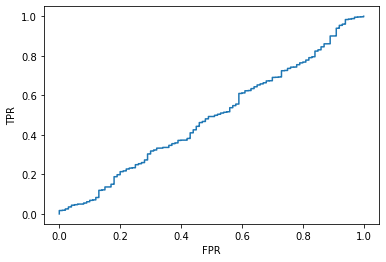

0.48829900000000004

In [10]:
result = auc(df_a)
result["AUC"]

In [11]:
accuracy_score(df_a,threshold)

{'Accuracy_Score': 0.9900990099009901}



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [12]:
df_b=pd.read_csv('5_b.csv')
threshold = 0.5
df_b.head(5)

,y,proba
0,0.0,0.281035
1,0.0,0.465152
2,0.0,0.352793
3,0.0,0.157818
4,0.0,0.276648


In [13]:
confusion_matix(df_b,threshold)

{'confusion_matix': [{'TN': 9761, 'FN': 45, 'FP': 239, 'TP': 55}]}

In [14]:
F_1_score(df_b,threshold)

{'F_1_score': 0.2791878172588833,
 'precision': 0.1870748299319728,
 'recall': 0.55}

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10100/10100 [1:11:00<00:00,  2.37it/s]


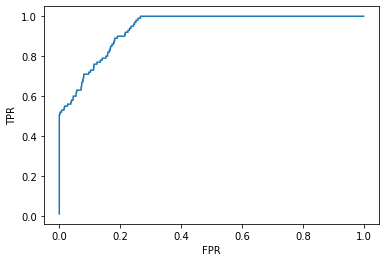

0.9377570000000001

In [15]:
result = auc(df_b)
result["AUC"]

In [16]:
accuracy_score(df_b,threshold)

{'Accuracy_Score': 0.9718811881188119}

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [17]:
df_c=pd.read_csv('5_c.csv')
df_c.head(5)

,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [18]:
df_c = df_c.rename({'prob': 'proba'}, axis=1)

In [19]:
from tqdm import tqdm
def matrix(df_a):
    df_a = df_a.sort_values(by='proba',ascending=False)
    df_a.reset_index(drop=True, inplace=True)
    value_y = df_a.y.value_counts()
    P_ve = value_y[1]
    N_ve = value_y[0]
    MA = {}
    for index in tqdm(range(len(df_a))):
        threshold = df_a['proba'][index]
        result = confusion_matix(df_a,threshold)
        m_value = (500*result['confusion_matix'][0]['FN'])+(100*result['confusion_matix'][0]['FP'])
        MA[threshold] = m_value
    df_a.drop(columns=['y_pred'])   
    return({"Matric":MA})
    

In [20]:
values_mat = matrix(df_c)
min_value = min(values_mat['Matric'].values())
for y,x in values_mat['Matric'].items():
    if min_value == x:
        print(y,":",x)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2852/2852 [08:25<00:00,  5.64it/s]

0.2300390278970873 : 141000



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [21]:
df_d=pd.read_csv('5_d.csv')
df_d.head(5)

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [22]:
def error(df):
    error_value = []
    for index in tqdm(range(len(df))):
        error_value.append(df['y'][index] - df['pred'][index])
    df['error'] = error_value
    return(df)    

In [23]:
def mean_square_error(df):
    df = error(df)
    sum_value = 0
    for index in range(len(df)):
        sum_value += (df['error'][index])**2 
    return({"mean_square_error":sum_value/index})

In [24]:
mean_square_error(df_d)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157200/157200 [00:04<00:00, 32808.49it/s]


{'mean_square_error': 177.1668267609845}

In [25]:
def MAPE(df):
    sum_error, sum_y = 0 , 0
    for index in tqdm(range(len(df))):
        sum_error += abs(df['error'][index])
        sum_y += abs(df['y'][index])
    mape = (sum_error/sum_y)
    return({"mape":mape})

In [26]:
MAPE(df_d)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157200/157200 [00:04<00:00, 35210.19it/s]


{'mape': 0.1291202994009687}

In [27]:
def R_2_error(df):
    ss_res, ss_tot = 0 , 0
    y_mean = df['y'].mean()
    for index in tqdm(range(len(df))):
        ss_res += (abs(df['error'][index]))**2
        ss_tot += (abs(df['y'][index])-y_mean)**2
    R_2_error = 1-(ss_res/ss_tot)
    return({"R_2_error":R_2_error})    

In [28]:
R_2_error(df_d)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 157200/157200 [00:06<00:00, 24053.13it/s]


{'R_2_error': 0.9563582786990964}